<a href="https://colab.research.google.com/github/neeshanth/EDA-TH-DA-1/blob/main/mod4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = "/content/HepatitisCdata.csv"
data = pd.read_csv(file_path)

# Drop rows with missing values
data_clean = data.dropna()

# Skewness, Kurtosis, and Correlation Matrix


Skewness of numerical columns:
Unnamed: 0     0.037553
Age            0.285828
ALB           -0.101968
ALP            4.744722
ALT            6.798556
AST            5.233212
BIL            8.068689
CHE           -0.066990
CHOL           0.377814
CREA          14.917076
GGT            5.921779
PROT          -1.059202
dtype: float64

Kurtosis of numerical columns:
Unnamed: 0     -1.170508
Age            -0.489240
ALB             6.060279
ALP            56.276926
ALT            80.916365
AST            33.420346
BIL            79.110688
CHE             1.333535
CHOL            0.708457
CREA          268.635274
GGT            46.901344
PROT            3.603351
dtype: float64

Correlation Matrix:


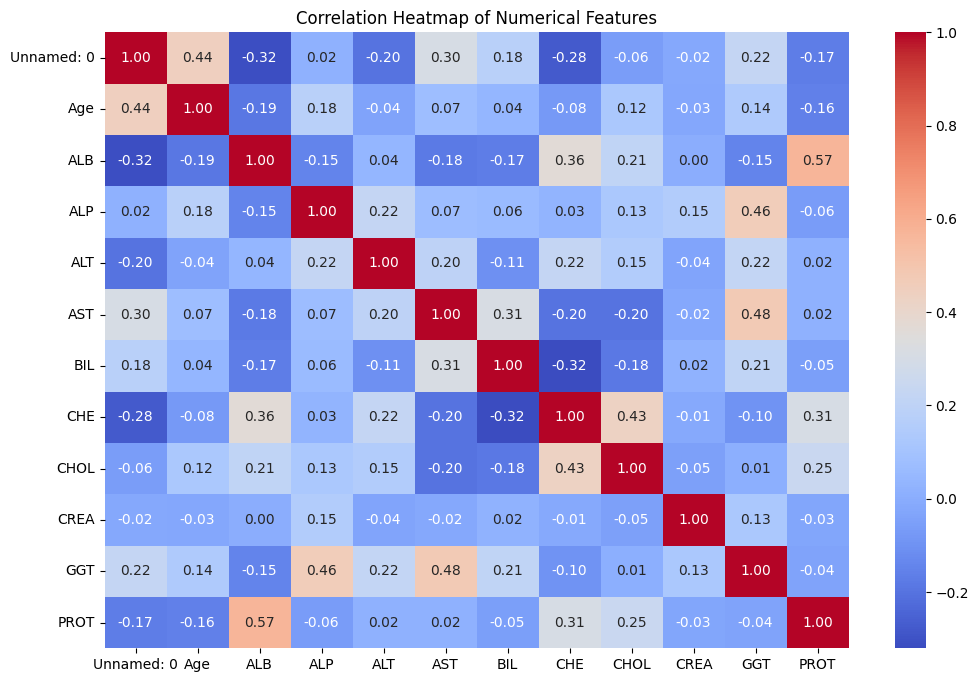

In [2]:
# Skewness and Kurtosis for numerical columns
numerical_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns
skewness_vals = data_clean[numerical_columns].apply(skew)
kurtosis_vals = data_clean[numerical_columns].apply(kurtosis)

print("\nSkewness of numerical columns:")
print(skewness_vals)
print("\nKurtosis of numerical columns:")
print(kurtosis_vals)

# Correlation Matrix
print("\nCorrelation Matrix:")
correlation_matrix = data_clean[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 1-D Statistical Data Analysis


1-D Statistical Analysis for 'CHOL':
Mean: 5.391341256366723
Median: 5.31
Standard Deviation: 1.1289541548203696
Min: 1.43, Max: 9.67


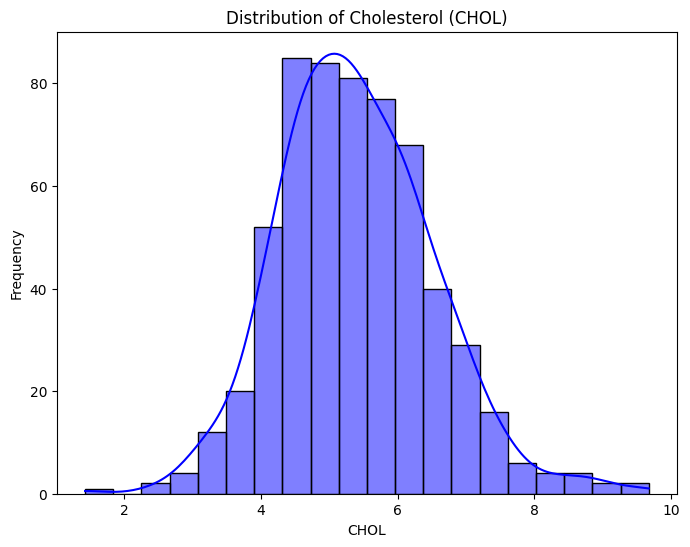

In [3]:
chol_data = data_clean['CHOL']  # Focus on Cholesterol
mean_chol = chol_data.mean()
median_chol = chol_data.median()
std_chol = chol_data.std()
min_chol = chol_data.min()
max_chol = chol_data.max()

print(f"\n1-D Statistical Analysis for 'CHOL':")
print(f"Mean: {mean_chol}")
print(f"Median: {median_chol}")
print(f"Standard Deviation: {std_chol}")
print(f"Min: {min_chol}, Max: {max_chol}")

# Visualizing Distribution
plt.figure(figsize=(8, 6))
sns.histplot(chol_data, kde=True, color='blue', bins=20)
plt.title("Distribution of Cholesterol (CHOL)")
plt.xlabel("CHOL")
plt.ylabel("Frequency")
plt.show()

# 2-D Statistical Data Analysis: Scatter Plots, Pairwise Relationships

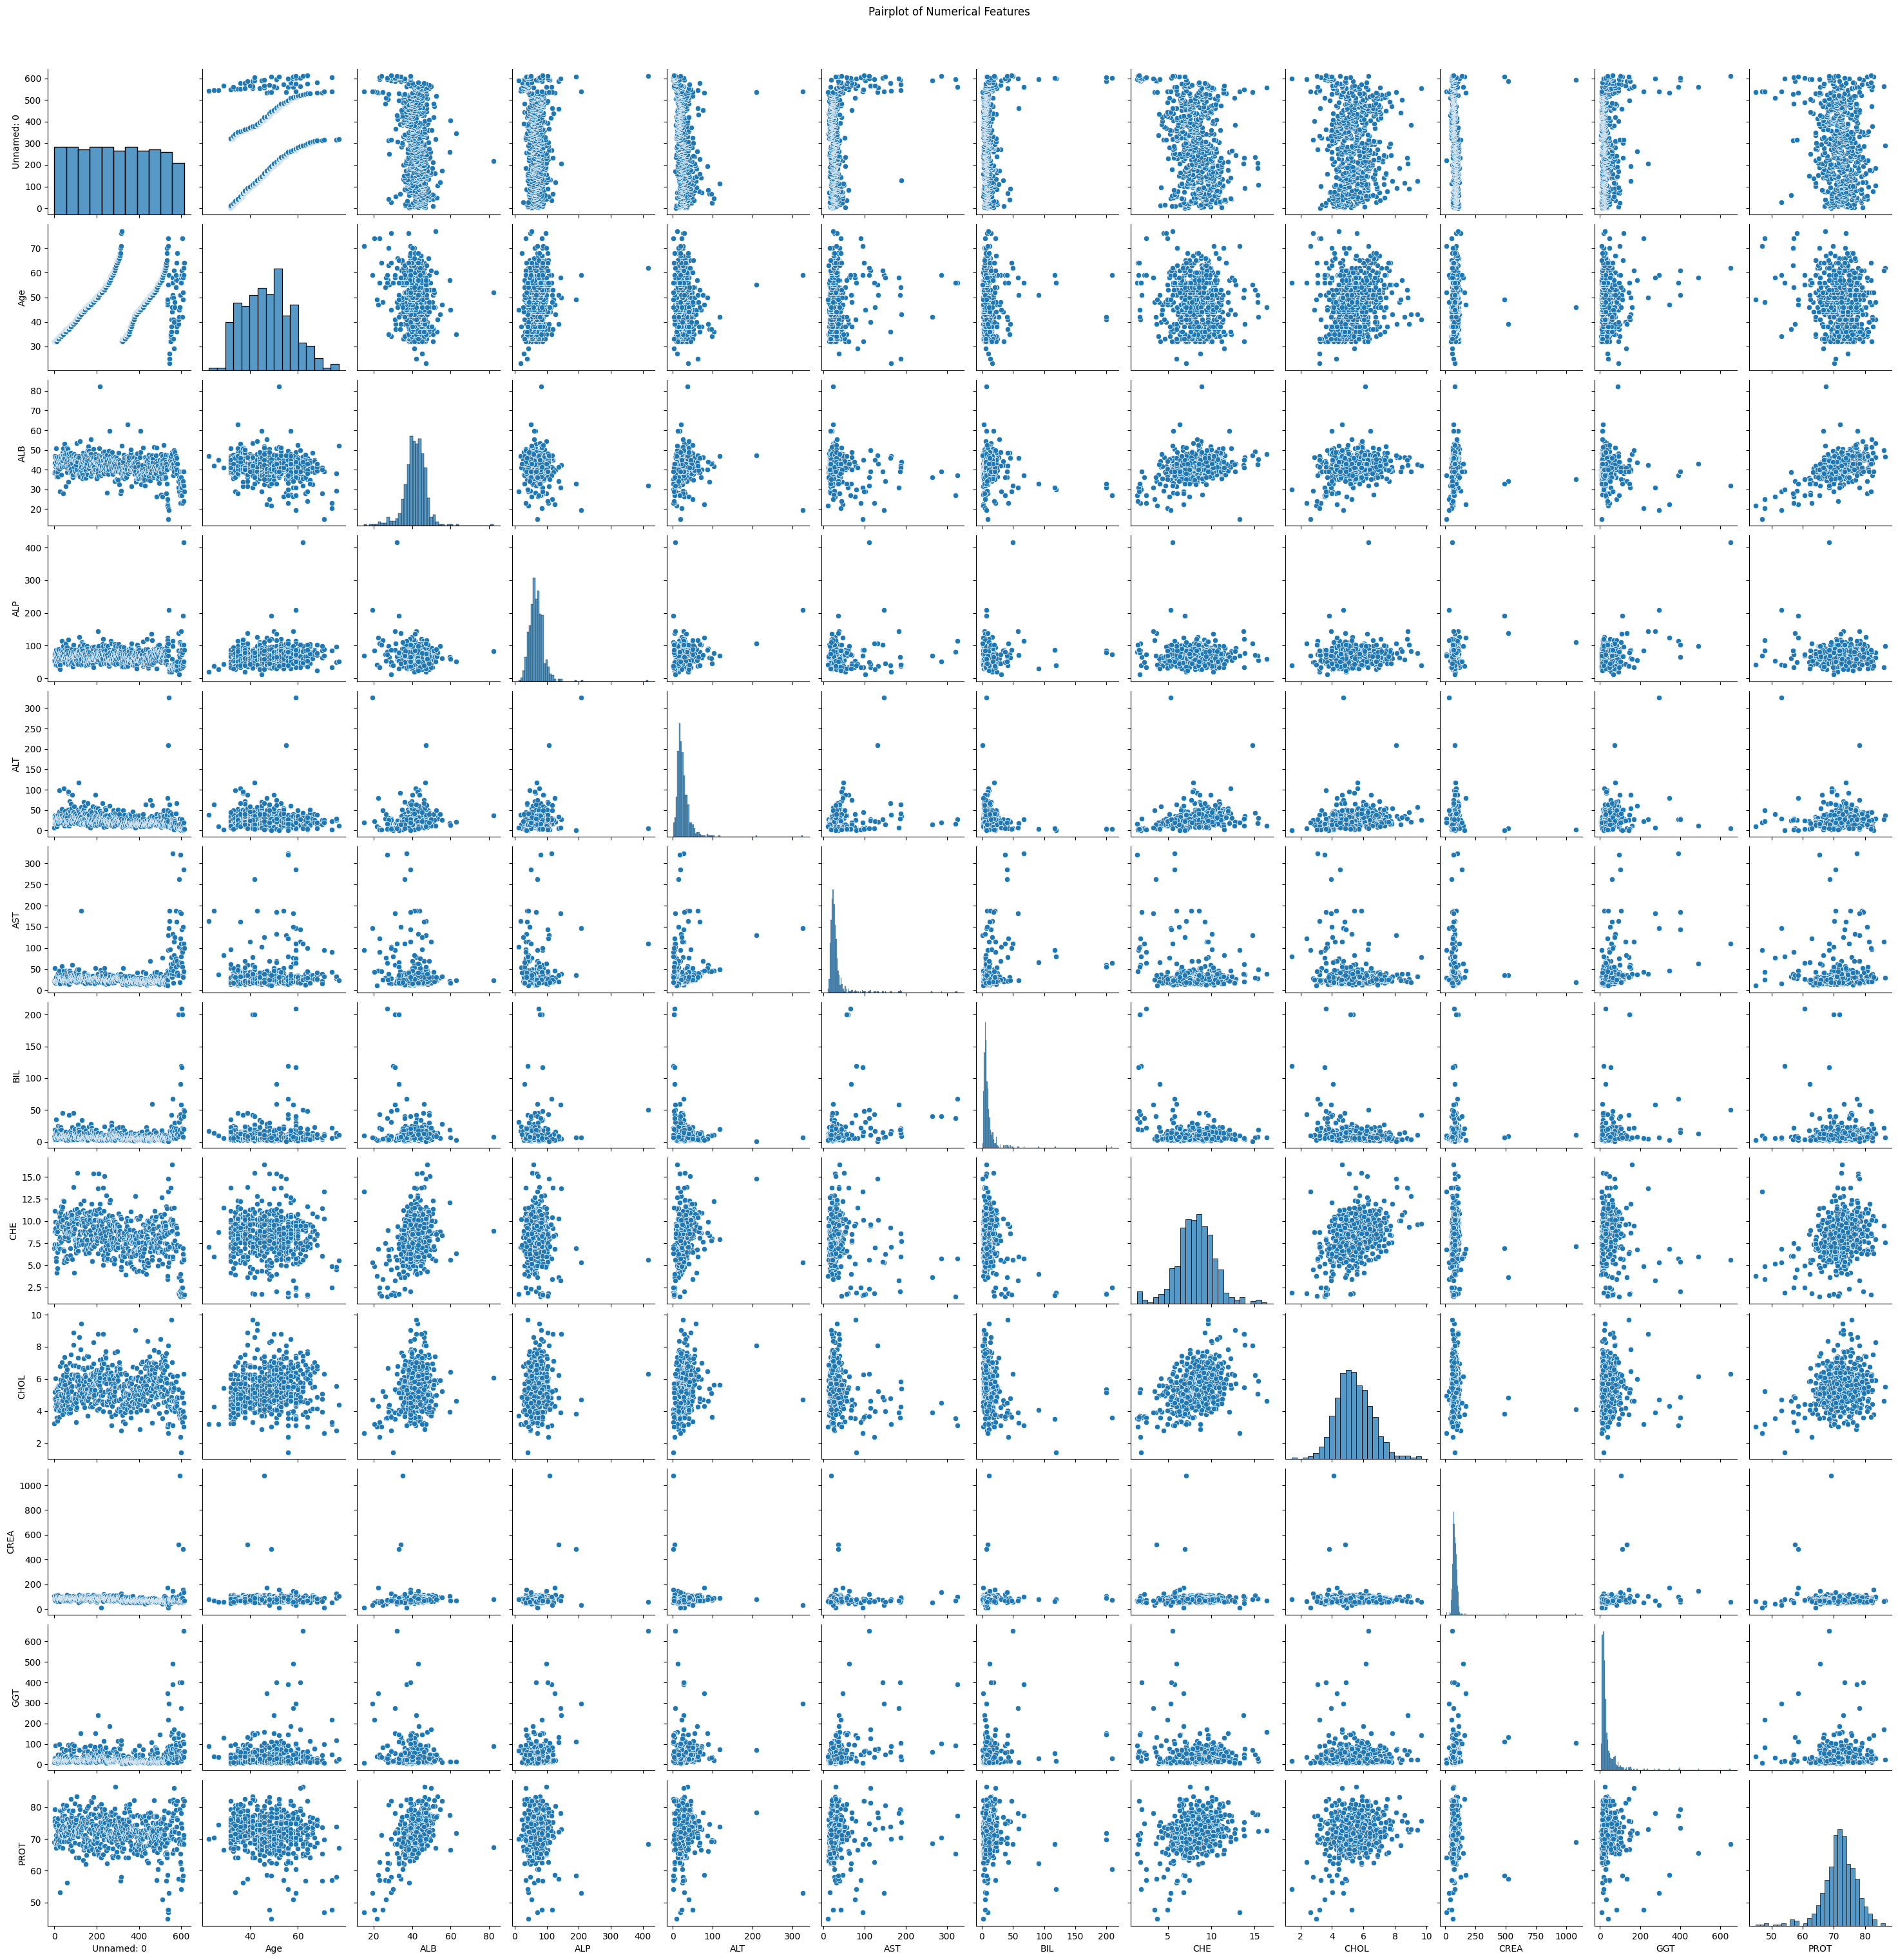

In [4]:
sns.pairplot(data_clean[numerical_columns])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Contingency Tables

In [5]:
categorical_columns = data_clean.select_dtypes(include=['object', 'category']).columns
for cat_col in categorical_columns:
    contingency_table = pd.crosstab(data_clean[cat_col], data_clean["Age"])  # Example: Relationship with Age
    print(f"\nContingency Table for {cat_col} and Age:")
    print(contingency_table)


Contingency Table for Category and Age:
Age                     23  25  27  29  32  33  34  35  36  37  ...  64  65  \
Category                                                        ...           
0=Blood Donor            0   0   0   0  14  23  18  20  14  20  ...   6   7   
0s=suspect Blood Donor   0   0   0   0   0   0   0   0   0   0  ...   0   0   
1=Hepatitis              1   1   1   0   2   1   1   1   1   0  ...   0   0   
2=Fibrosis               0   0   0   1   0   0   0   0   1   0  ...   1   0   
3=Cirrhosis              0   0   0   0   0   0   0   0   0   0  ...   2   0   

Age                     66  67  68  70  71  74  76  77  
Category                                                
0=Blood Donor            4   3   3   3   1   0   2   1  
0s=suspect Blood Donor   0   0   0   0   1   1   0   0  
1=Hepatitis              0   0   0   0   0   0   0   0  
2=Fibrosis               0   0   1   0   0   0   0   0  
3=Cirrhosis              0   0   0   0   0   1   0   0  

[5 ro

# n-D Statistical Data Analysis: PCA (Dimensionality Reduction)

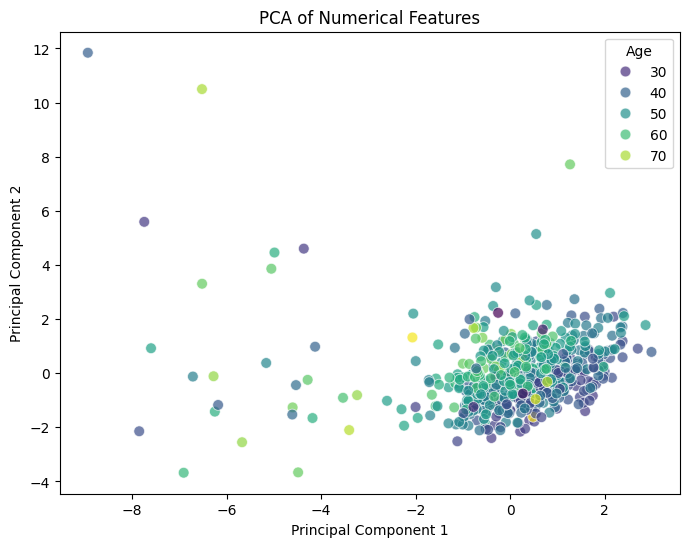

In [6]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns])

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# DataFrame for PCA result
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=data_clean["Age"], palette="viridis", s=60, alpha=0.7)
plt.title("PCA of Numerical Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Age")
plt.show()

# Visualization: Scatter plots, Dot charts, and Bar plots

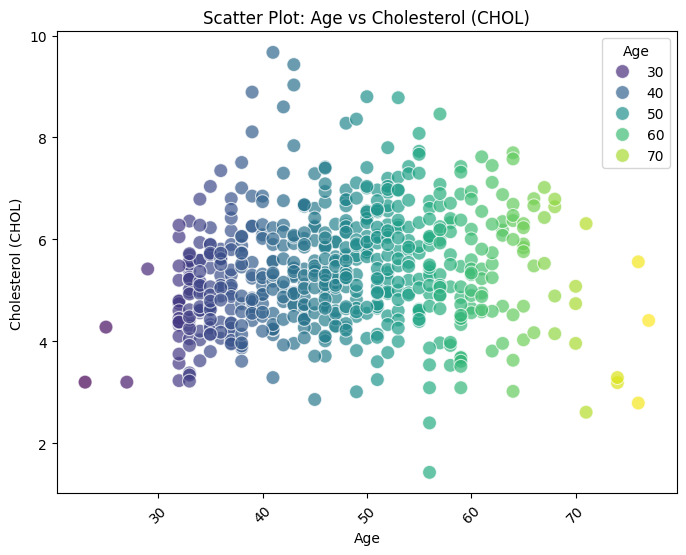

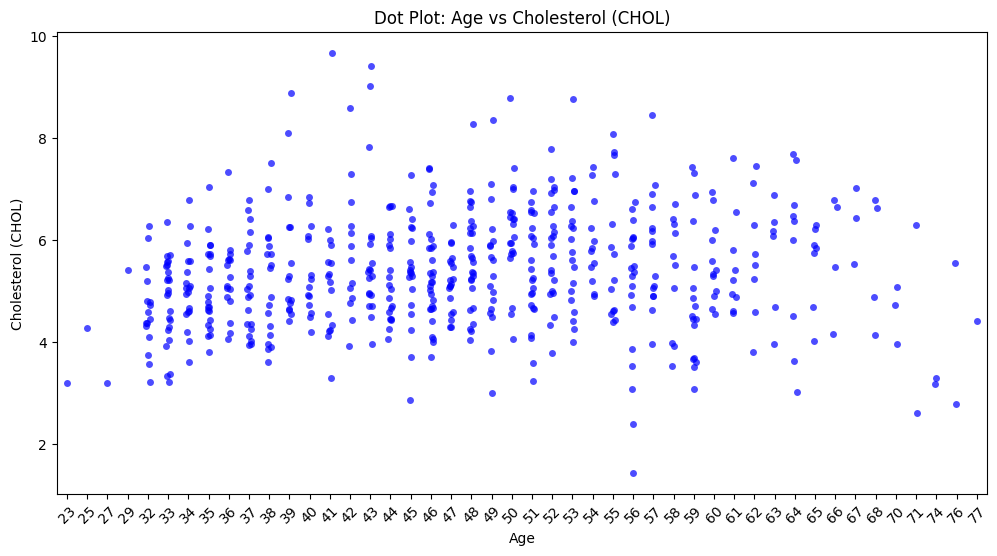

<ipython-input-10-e74a44a1e9f4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=age_groups, palette="viridis")


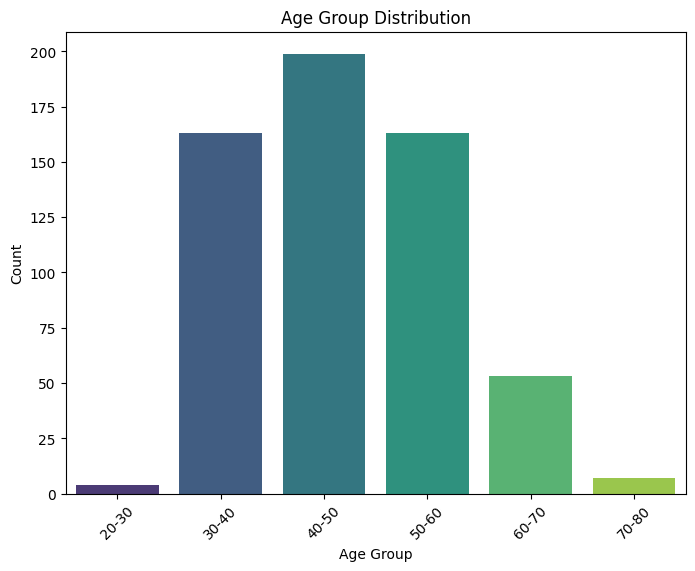

In [10]:
# Scatter plot example (CHOL vs Age)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_clean["Age"], y=data_clean["CHOL"], hue=data_clean["Age"], palette="viridis", s=100, alpha=0.7)
plt.title("Scatter Plot: Age vs Cholesterol (CHOL)")
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.ylabel("Cholesterol (CHOL)")
plt.show()

# Dot plot example (CHOL vs Age)
plt.figure(figsize=(12, 6))
sns.stripplot(x=data_clean["Age"], y=data_clean["CHOL"], jitter=True, color='blue', alpha=0.7)
plt.title("Dot Plot: Age vs Cholesterol (CHOL)")
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.ylabel("Cholesterol (CHOL)")
plt.show()

# Bar plot example (Age Group counts)
age_groups = pd.cut(data_clean["Age"], bins=[20, 30, 40, 50, 60, 70, 80], labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])
plt.figure(figsize=(8, 6))
sns.countplot(x=age_groups, palette="viridis")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()